# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Functions for simulation
from MMn import simulate_MMn
from MMn_SJF import simulate_MMn_SJF
from MDn import simulate_MDn
from MLn import simulate_MLn

# Functions used for analysis
from Analysis import *

# Constant Parameters

In [2]:
customers = 100000

# Problem 2  

# Problem 3

Average waiting time: 3.1431433404395124 +- 0.0832583515685699


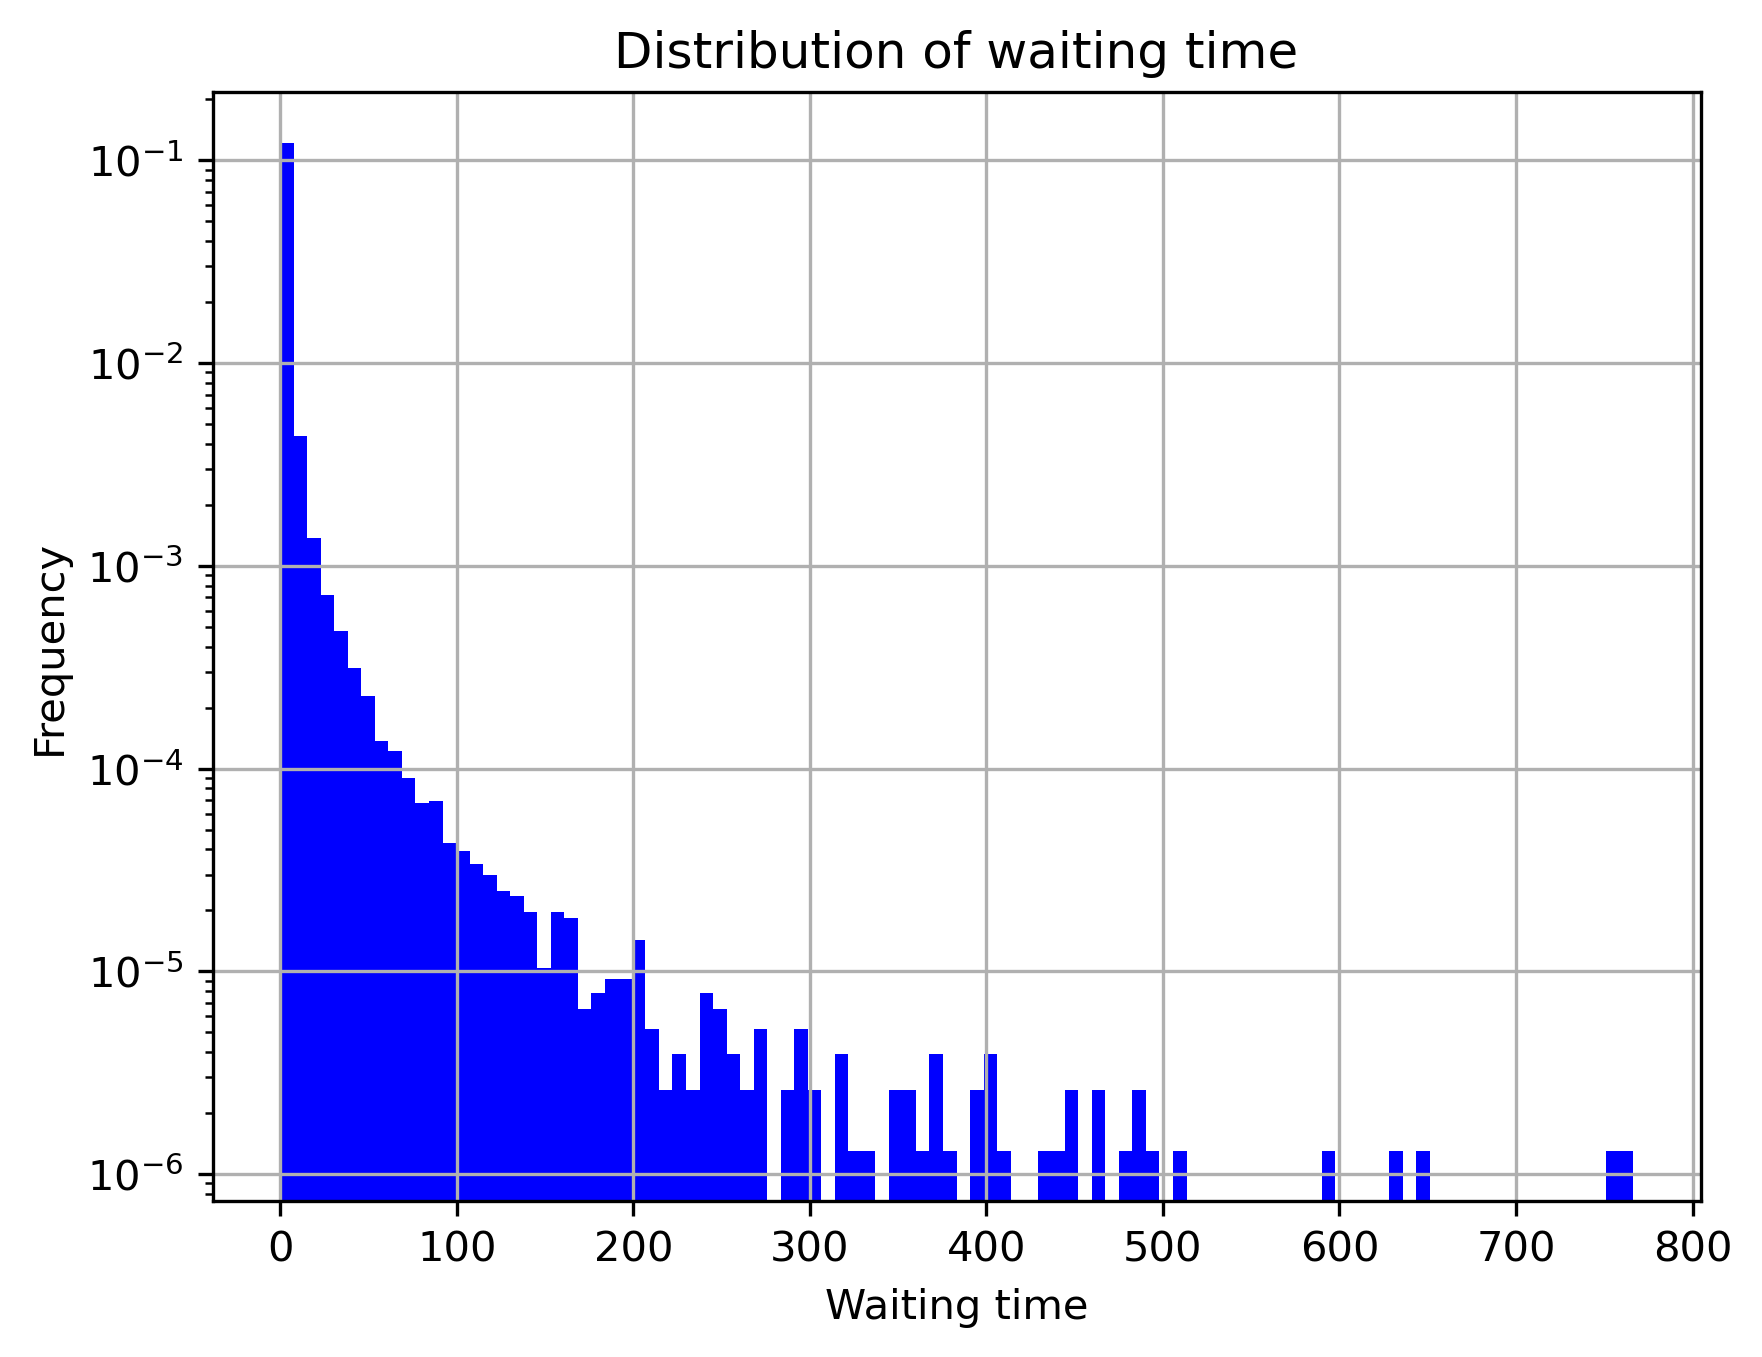

In [5]:
# Parameters
mu = 1
rho = 0.9
n = 1

# Get the waiting times
waiting = simulate_MMn_SJF(customers, rho, mu)

# Mean and confidence interval
wait_avg, wait_conf = statistics(waiting)

# Plotting
fig, ax = visualize(waiting, 'Distribution of waiting time', yscaling='log')

# Problem 4
### M/D/n

Average waiting time: 4.141383877793152 +- 0.025539035262092447
Average waiting time: 4.35561776984773 +- 0.027012719963988054
Average waiting time: 4.784753368150444 +- 0.03216015432773846


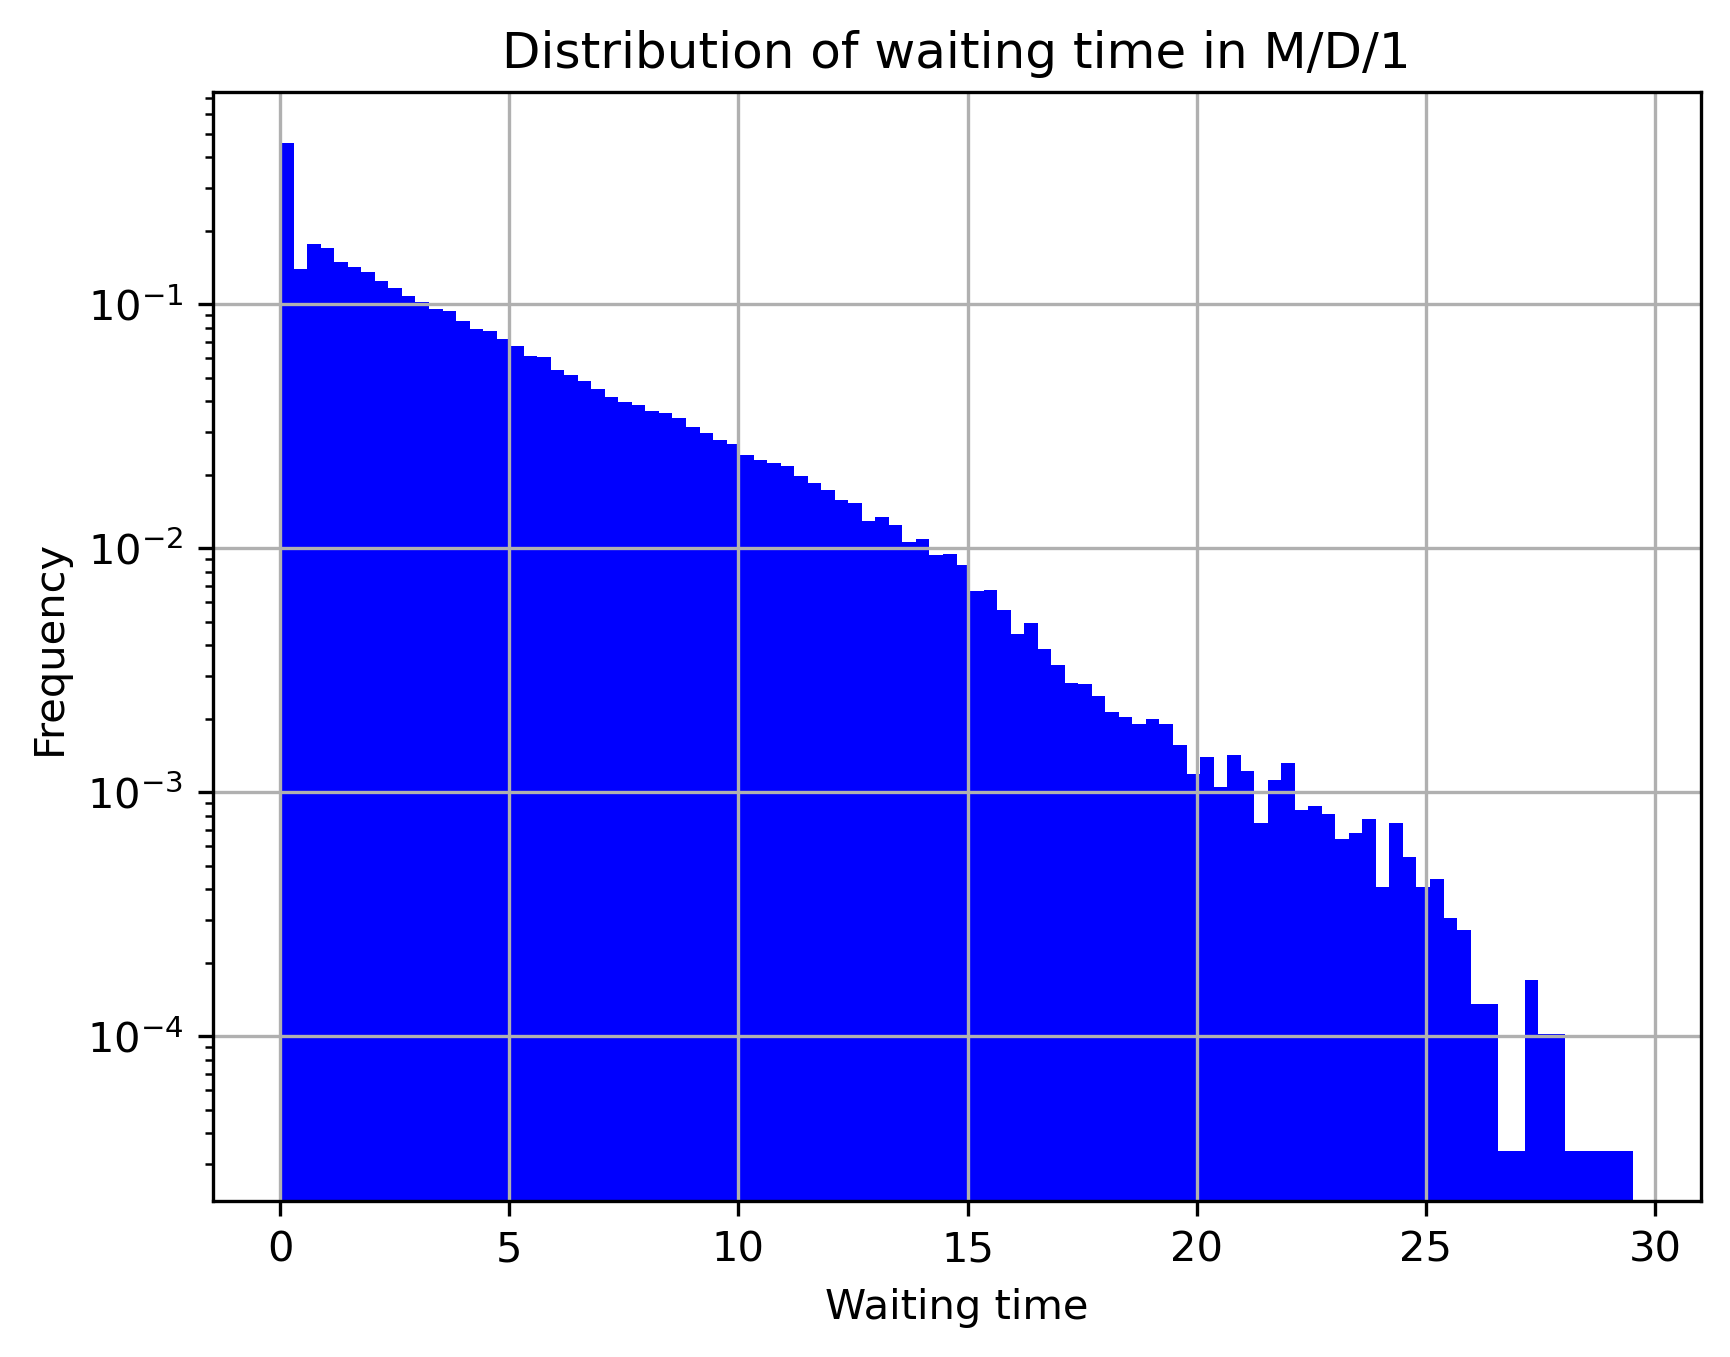

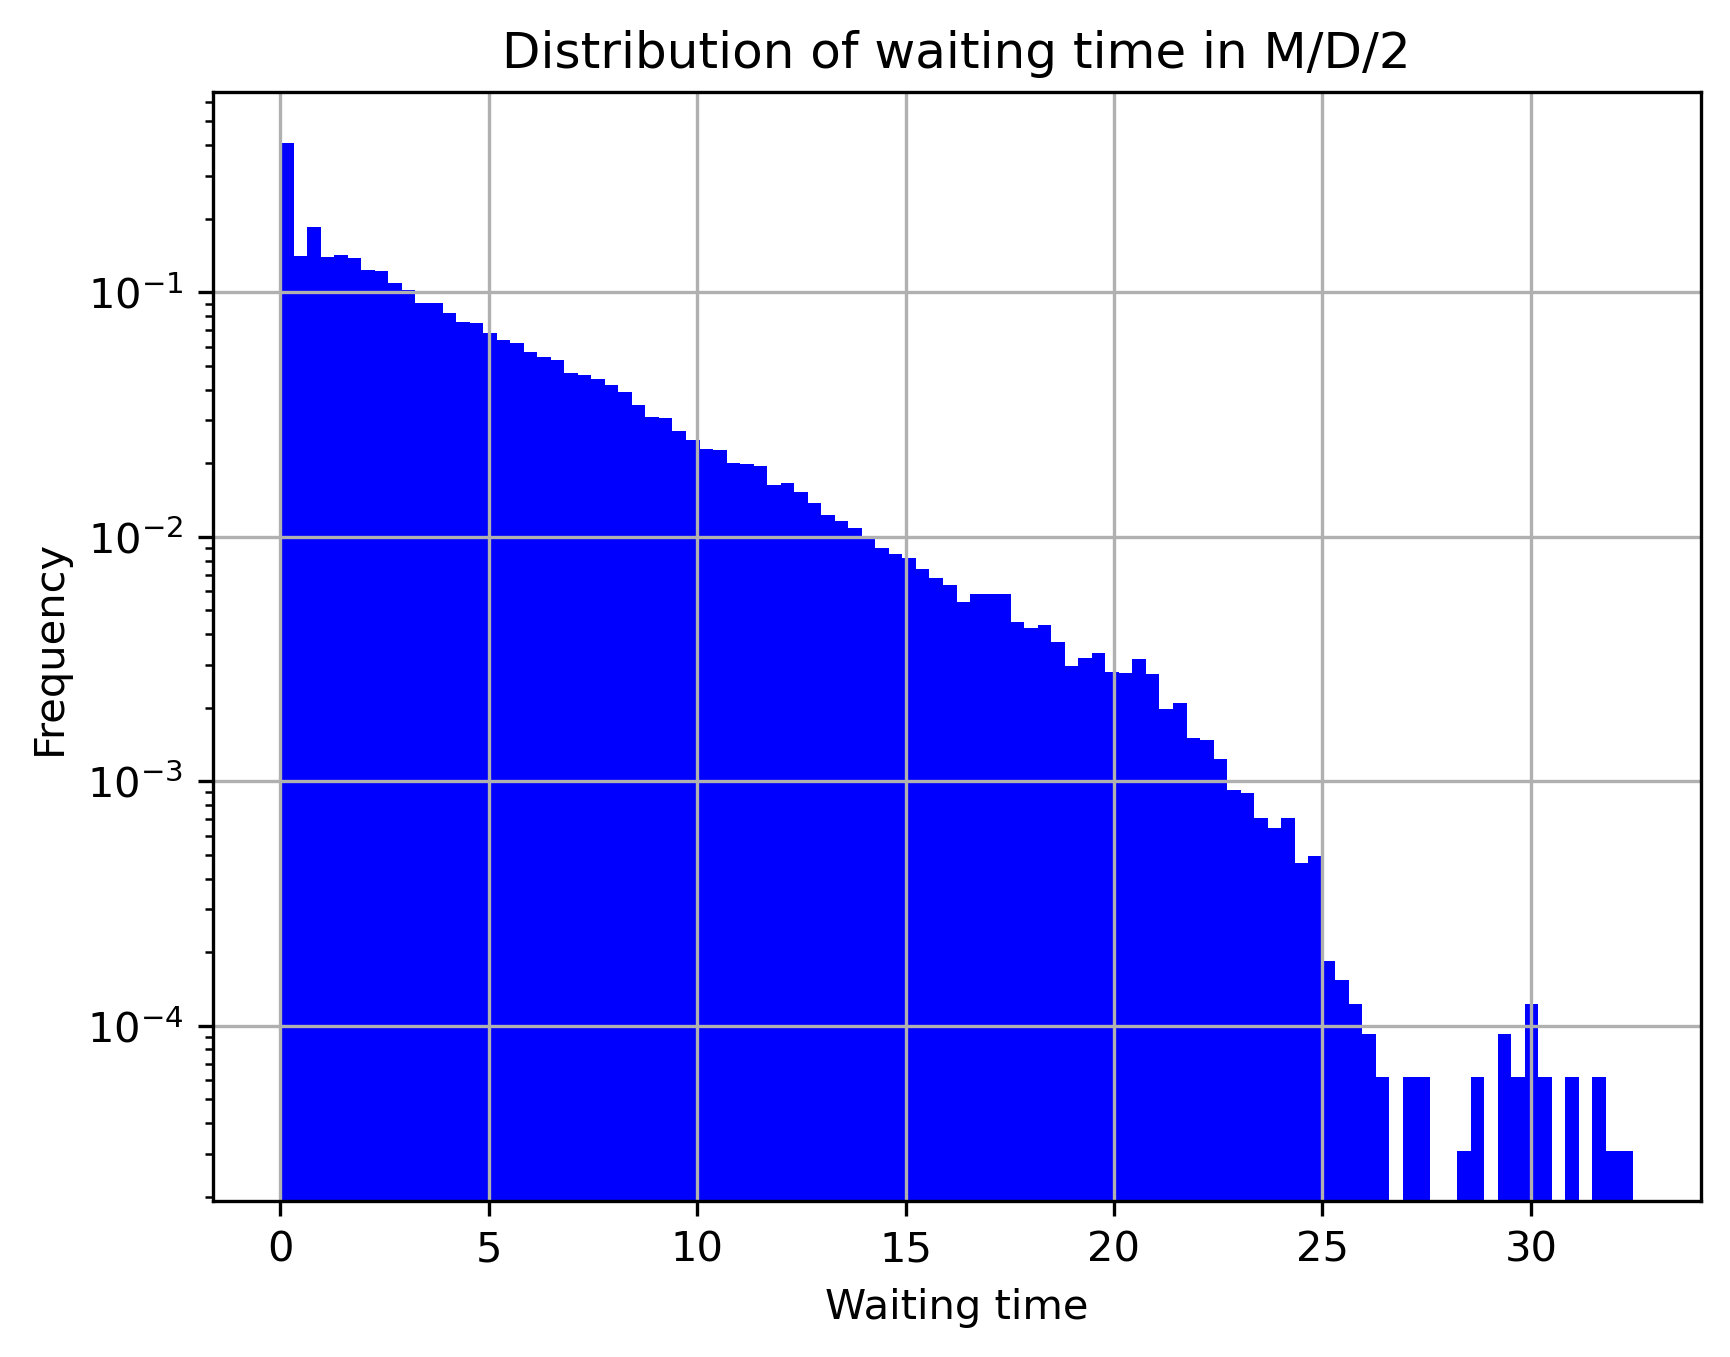

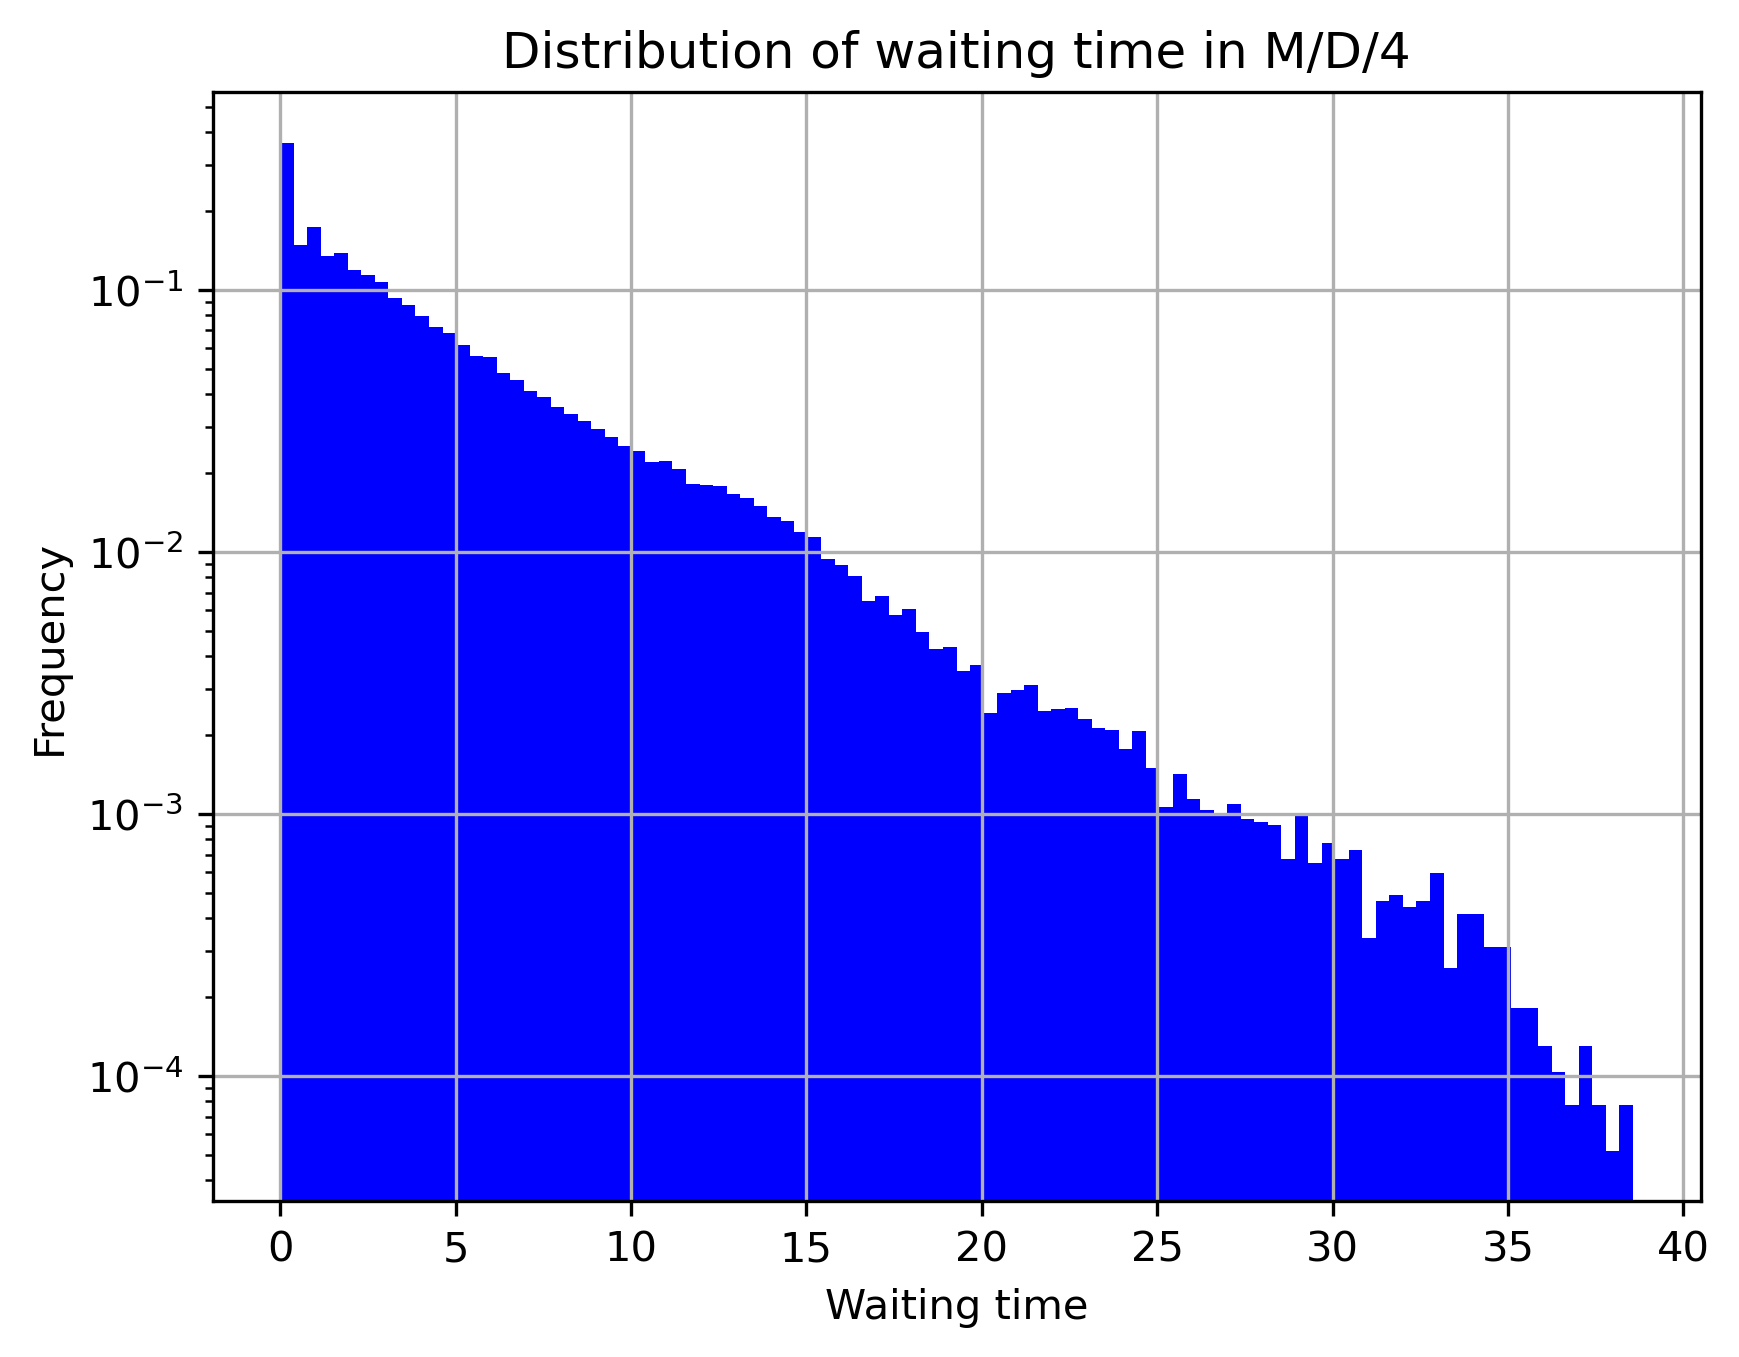

In [3]:
# Parameters
mu = 1
rho = 0.9

# Compare M/D/1 with M/D/n
ns = [1, 2, 4]
for n in ns:
    W = simulate_MDn(customers, rho, mu, 1)
    statistics(W)
    fig, ax = visualize(W, f'Distribution of waiting time in M/D/{n}', yscaling='log')

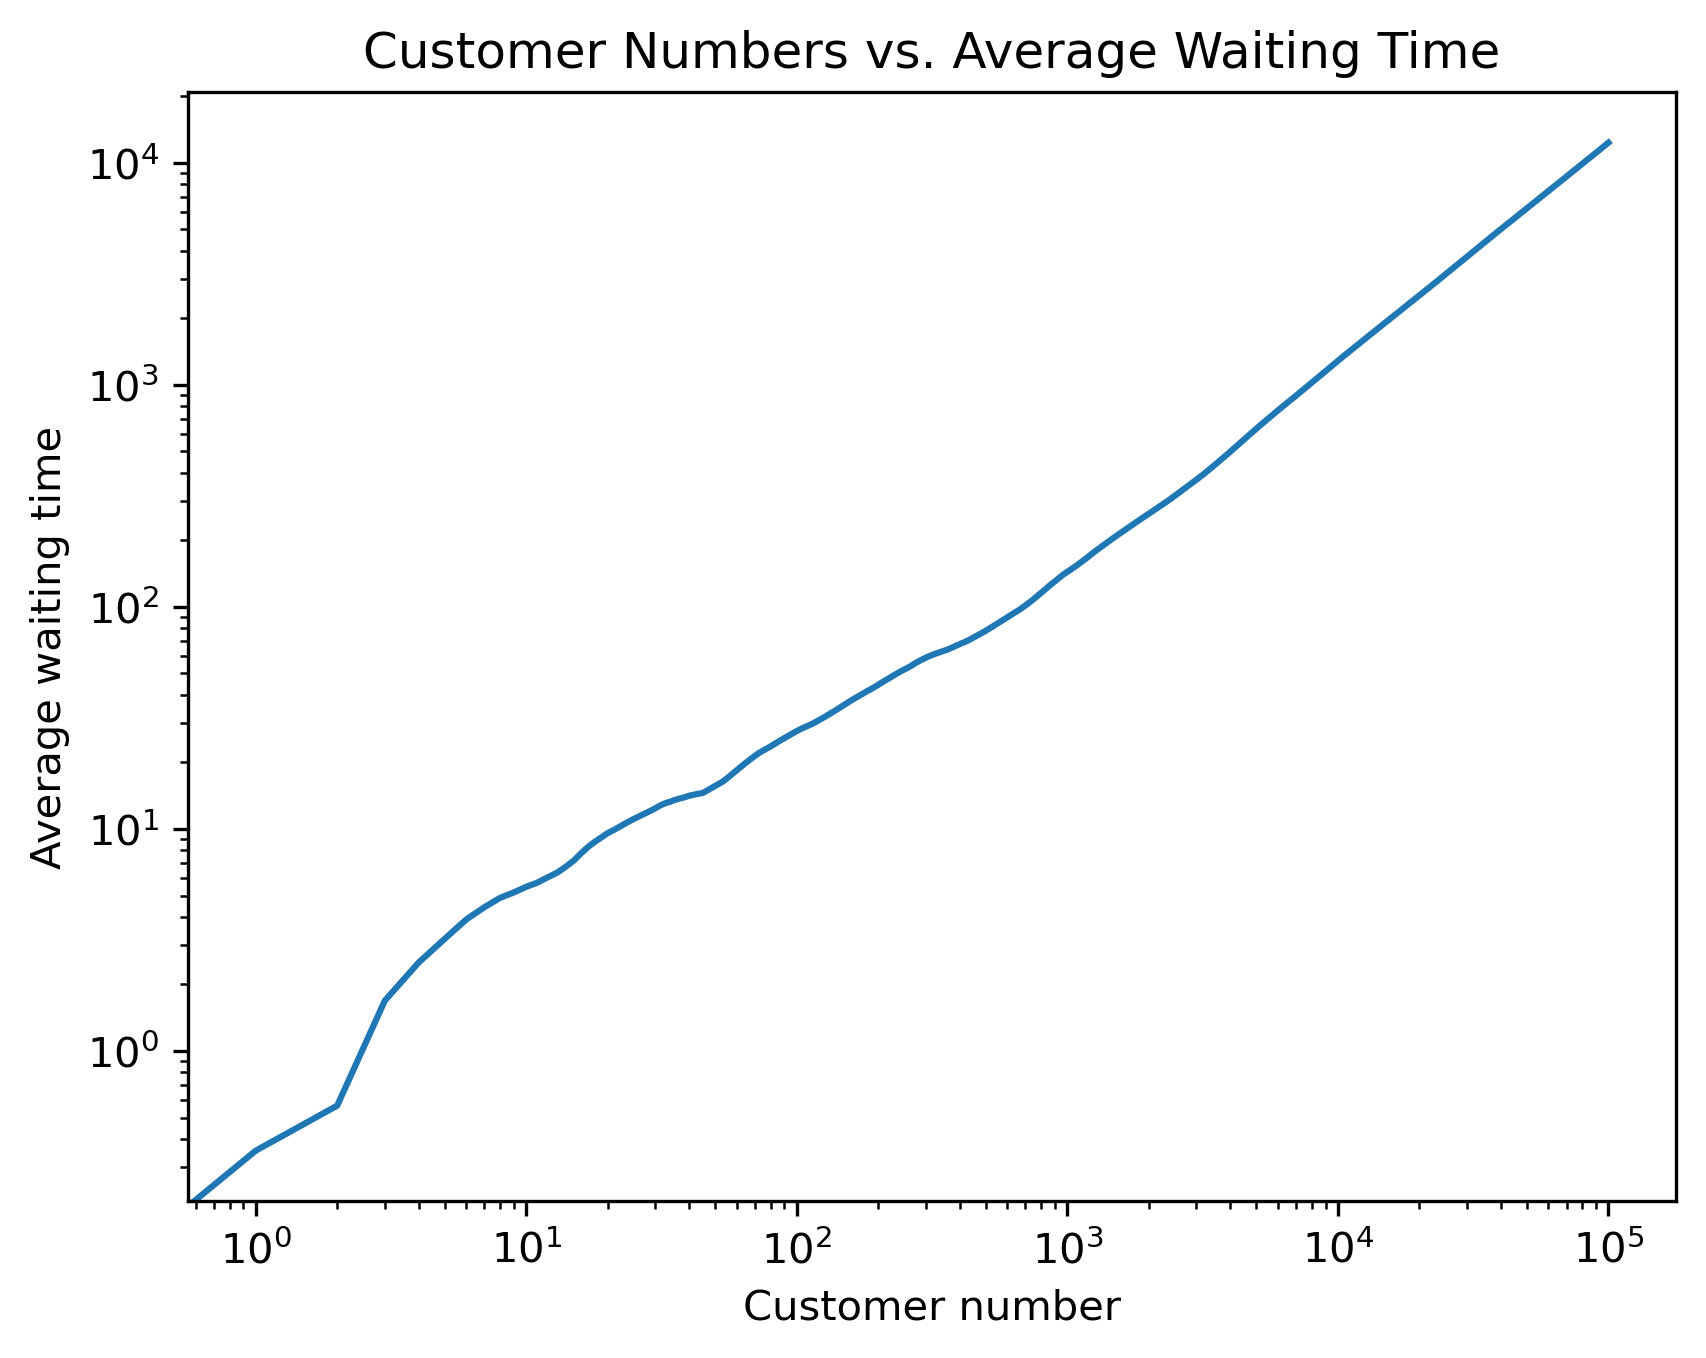

In [4]:
# How does the average waiting time change with customer number
mu = [1, 5]
p = 0.75
w = simulate_MLn(customers, rho, mu, p, 1)

# Get means
waiting_means = np.cumsum(w) / np.arange(1, customers + 1)

plt.figure(dpi=300)
plt.title('Customer Numbers vs. Average Waiting Time')
plt.ylabel('Average waiting time')
plt.xlabel('Customer number')
plt.plot(waiting_means)
plt.xscale('log')
plt.yscale('log')
plt.show()

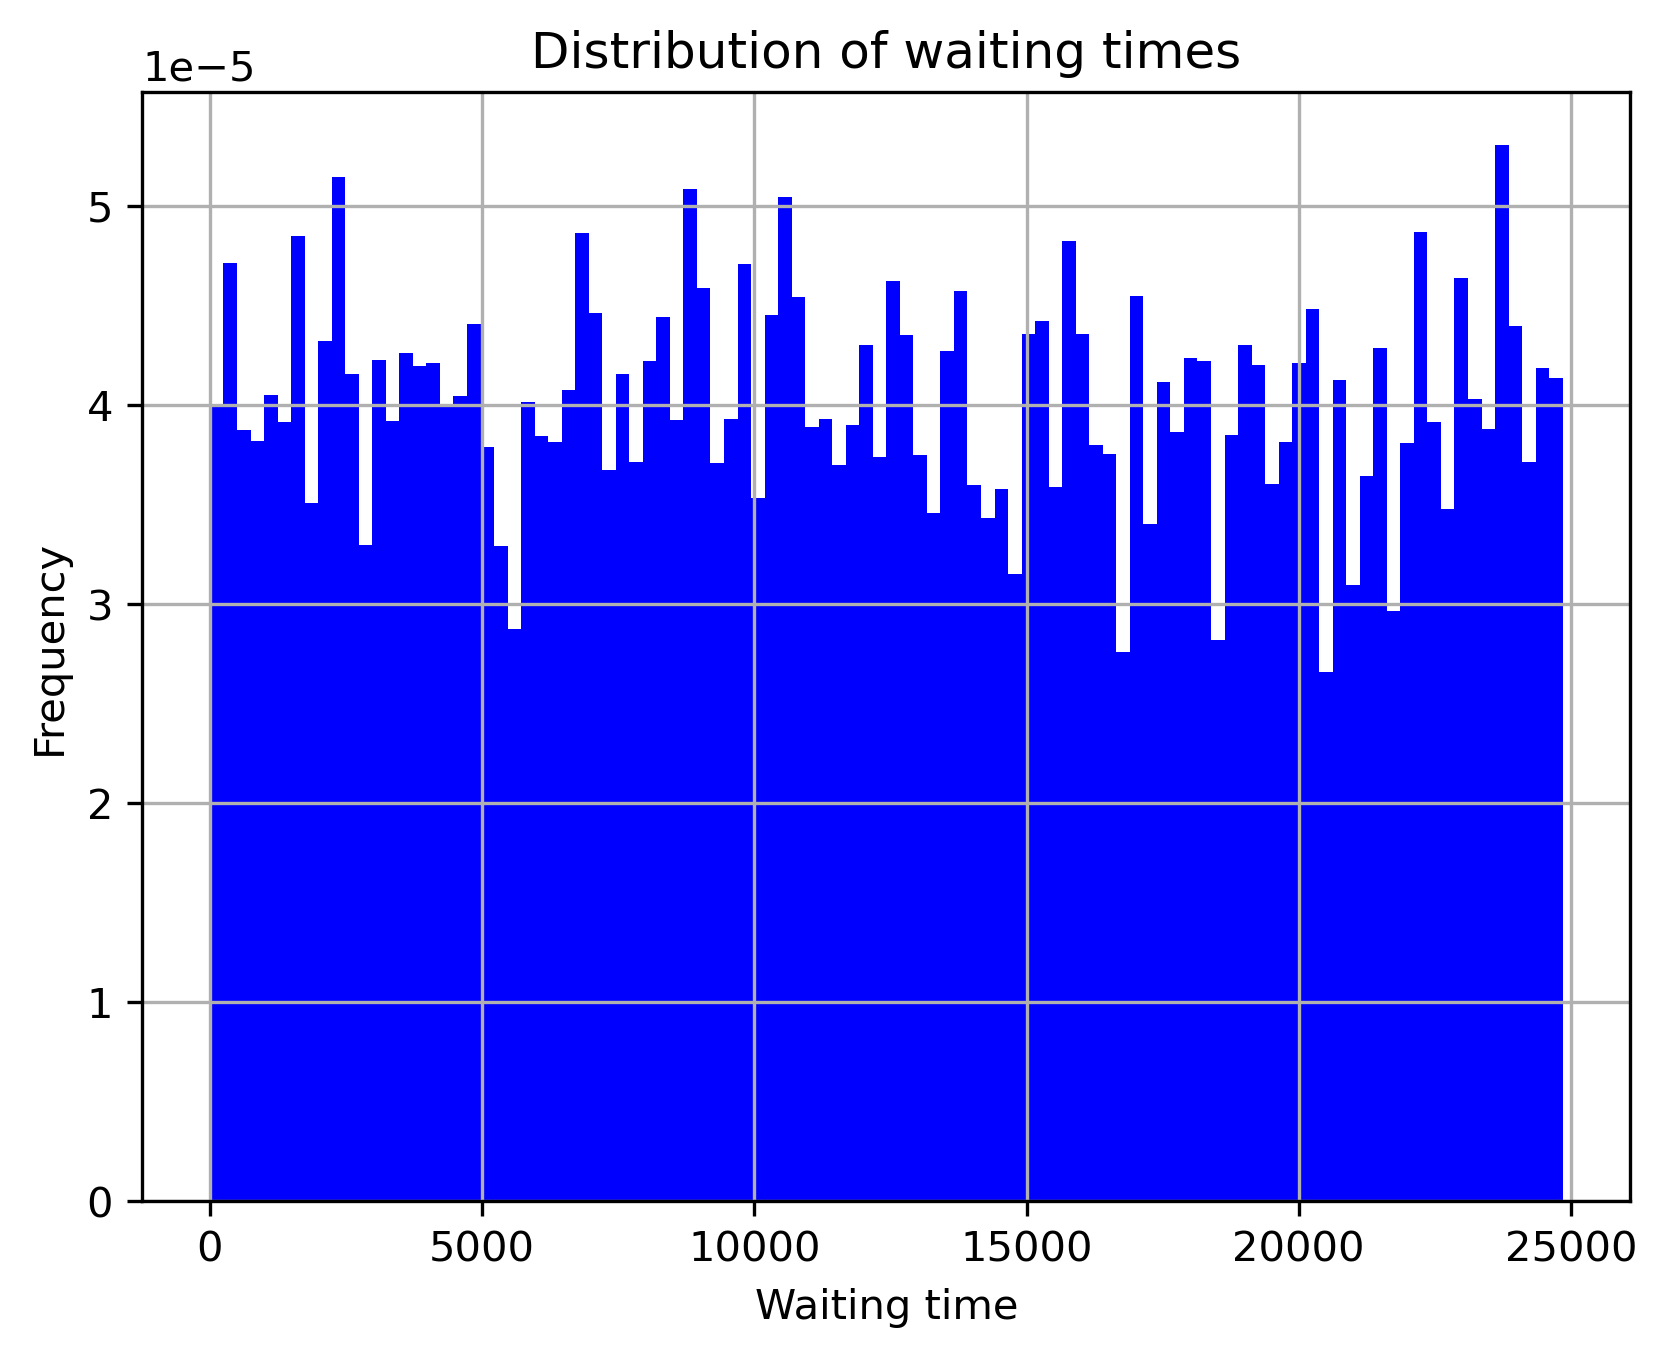

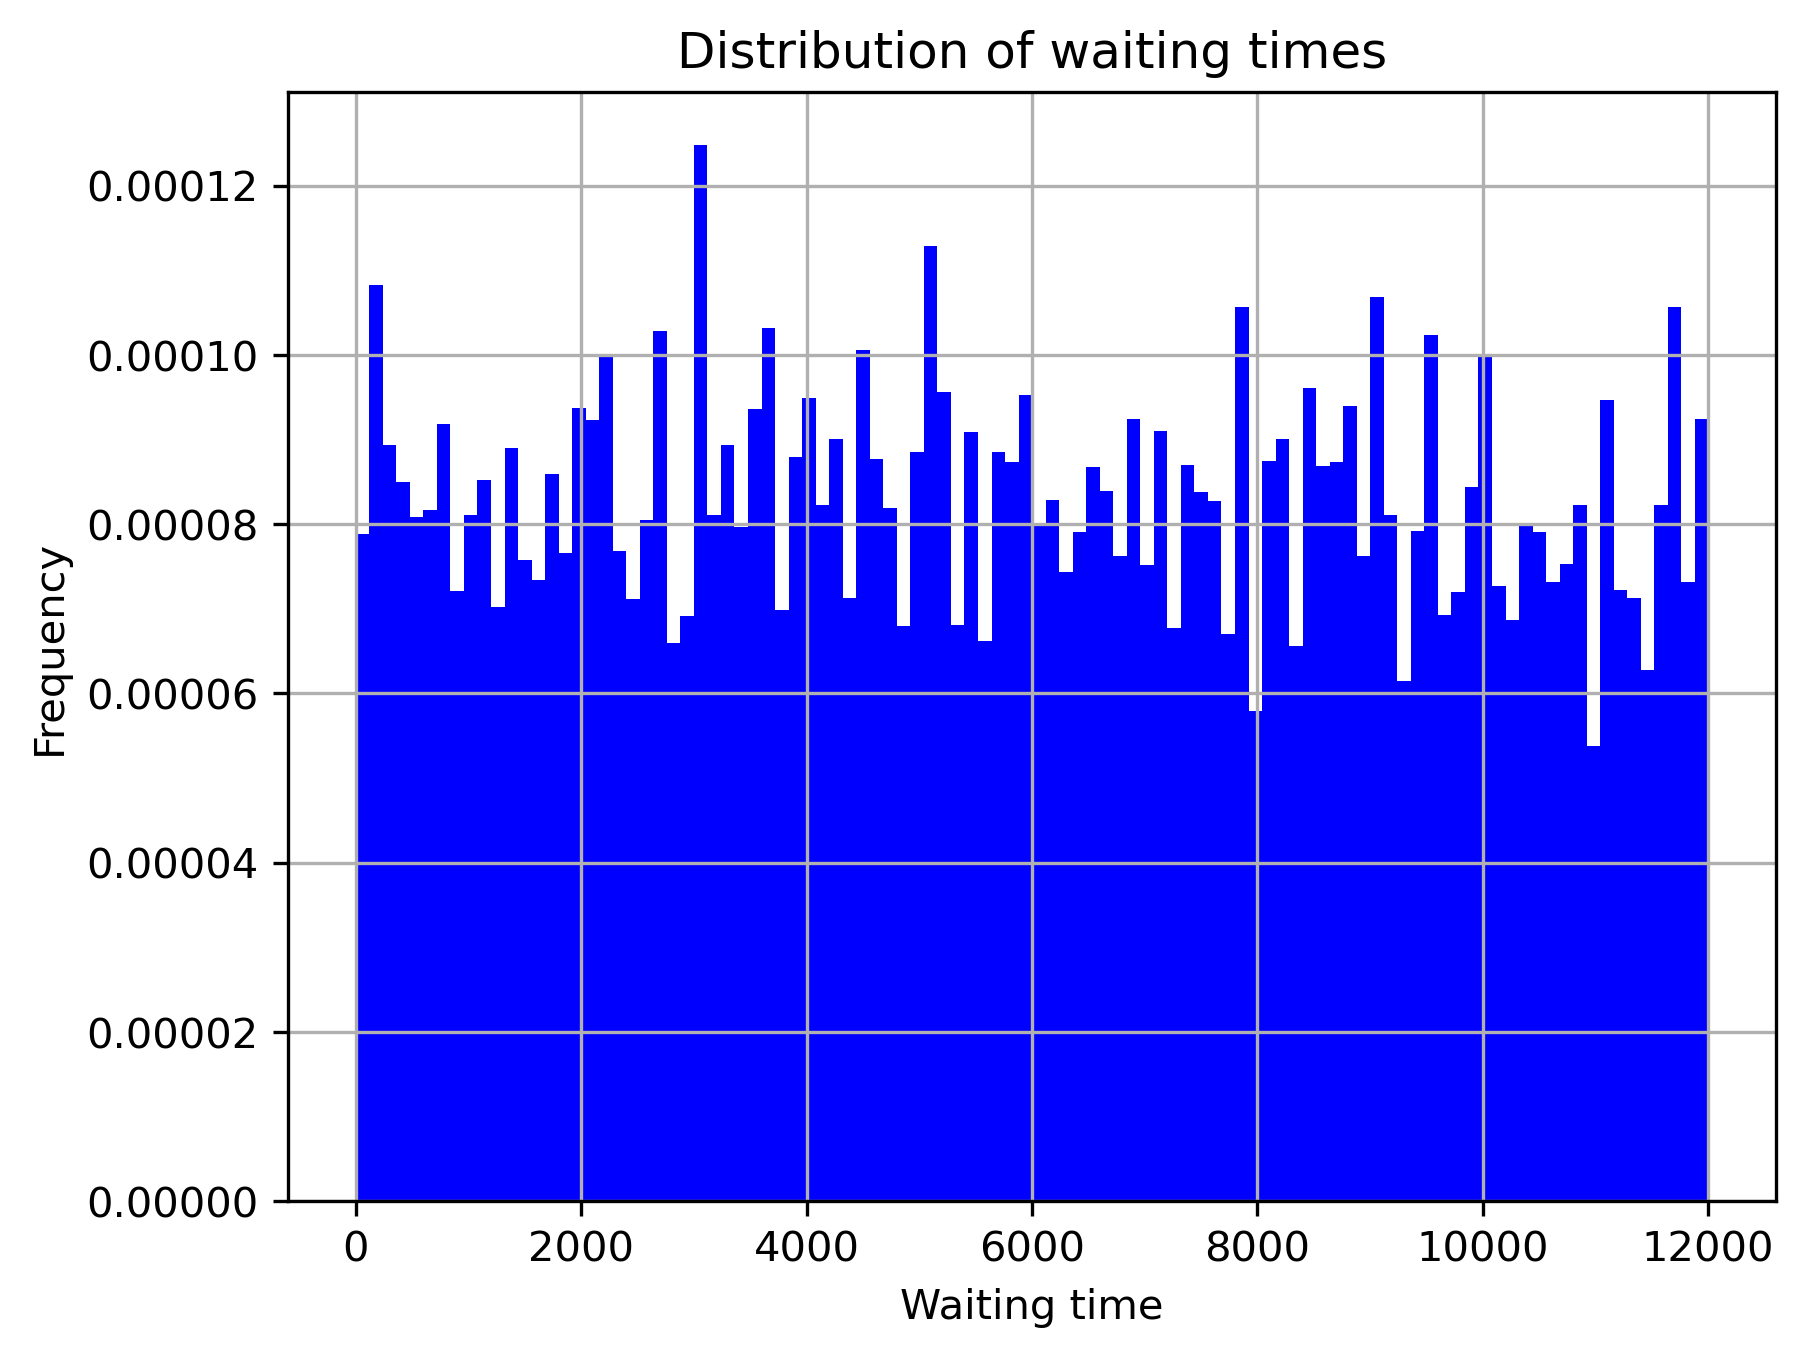

In [5]:
# Show the distributions of waiting times in M/L/1 and M/L/n
waiting = simulate_MLn(customers, rho, mu, p, 1)
fig, ax = visualize(waiting)

waiting = simulate_MLn(customers, rho, mu, p, 2)
fig, ax = visualize(waiting)